# Packages

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Functions

## Numerical categorization

In [36]:
def categorizar(base):
    aux1 = pd.DataFrame()
    aux2 = pd.DataFrame()
    LE = LabelEncoder()
    for i in list(range(0,base.shape[1],1)):
        label = LE.fit_transform(pd.DataFrame(base.iloc[:,i]))
        aux2 = pd.DataFrame(label)
        aux2 = aux2.rename(columns={0: pd.DataFrame(base.iloc[:,i]).columns.values[0]})
        aux1 = pd.concat([aux1, aux2], axis=1)
    return(aux1)

# Data

In [2]:
data = pd.read_csv('../00.Data/BankChurners.csv')
# Ignoring the last 2 columns
ignore = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
data.drop(columns=ignore, inplace=True)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


What are the columns names of the dataframe?

- We are not going to use the: 'CLIENTNUM' and 'Gender' (Brazilian General Data Protection Law, https://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13709.htm)
- Target variable: 'Attrition_Flag'

In [3]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [4]:
data.drop(columns=['CLIENTNUM', 'Gender'], inplace=True)

In [5]:
data.shape

(10127, 19)

Our classes are **imbalanced** and the ratio of 'Existing Customer' to 'Attited Customer' is 84:16.

In [6]:
# Target
data['Attrition_Flag'].value_counts()/data.shape[0]

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [8]:
# Duplicated rows in dataset
data.duplicated().sum()
# We do not have duplicated rows

0

In [9]:
data.head(2)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


Average distribution for each variable by the 'Attrition_Flag'.

In [10]:
data.groupby('Attrition_Flag').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


Average distribution for each variable by the 'Education_Level'.

In [11]:
data.groupby('Education_Level').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Education_Level,,,,,,,,,,,,,,
College,45.970385,2.359329,35.682132,3.749260,2.353406,2.425469,8684.536130,1135.783810,7548.752320,0.764443,4255.806515,65.016782,0.714878,0.265399
Doctorate,47.261641,2.325942,36.820399,3.747228,2.352550,2.450111,8413.258980,1094.084257,7319.174723,0.741044,4193.015521,63.784922,0.692656,0.260619
Graduate,46.323529,2.347506,35.970588,3.825128,2.350064,2.459719,8566.100927,1162.380115,7403.720812,0.757418,4418.491368,64.883312,0.710724,0.277719
High School,46.345256,2.311972,35.970691,3.807253,2.329856,2.446597,8605.823547,1194.353204,7411.470343,0.762508,4403.740189,64.692996,0.714512,0.278275
Post-Graduate,45.562016,2.399225,35.352713,3.893411,2.313953,2.422481,8862.560465,1187.674419,7674.886047,0.767705,4515.414729,65.000000,0.702709,0.280572
Uneducated,46.423672,2.353060,35.949563,3.843309,2.365837,2.488904,8899.509011,1154.079354,7745.429657,0.760446,4484.340955,65.315400,0.719299,0.271590
Unknown,46.428571,2.361422,35.859776,3.797893,2.311389,2.457538,8491.798947,1160.449638,7331.349309,0.761209,4420.053325,64.745885,0.712616,0.276469


Average distribution for each variable by the 'Income_Category'.

In [12]:
data.groupby('Income_Category').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Income_Category,,,,,,,,,,,,,,
$120K +,47.603851,2.462173,36.891334,3.778542,2.331499,2.537827,19717.322558,1222.196699,18495.125860,0.752459,4529.467675,63.704264,0.688702,0.125307
$40K - $60K,46.087151,2.308380,35.873184,3.783240,2.294413,2.460894,5462.259832,1171.994413,4290.265419,0.759531,4405.618994,65.000559,0.711113,0.316561
$60K - $80K,45.968616,2.440086,35.597004,3.833809,2.329529,2.455777,10758.772967,1154.993581,9603.779387,0.772189,4450.712553,63.247504,0.720776,0.206075
$80K - $120K,46.428013,2.492508,36.074267,3.816938,2.327036,2.485342,15809.890945,1206.727036,14603.163909,0.766633,4482.960261,62.696417,0.713868,0.161664
Less than $40K,46.297950,2.263690,35.881775,3.823364,2.367032,2.420388,3754.404521,1145.136759,2609.267762,0.752417,4363.420107,66.154732,0.711770,0.377280
Unknown,46.274281,2.275180,35.753597,3.814748,2.374101,2.462230,9516.582464,1115.064748,8401.517716,0.764903,4282.211331,66.250899,0.717778,0.220810


Average distribution for each variable by the 'Marital_Status'.

In [13]:
data.groupby('Marital_Status').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Marital_Status,,,,,,,,,,,,,,
Divorced,45.116310,2.377005,35.145722,3.863636,2.347594,2.422460,9358.565107,1155.981283,8202.583824,0.755584,4529.090909,66.925134,0.702525,0.256947
Married,46.735012,2.366332,36.213996,3.841050,2.333476,2.457222,8076.661895,1197.163644,6879.498250,0.772312,4173.417965,61.725411,0.715721,0.289650
Single,46.213036,2.279990,35.877758,3.778849,2.352523,2.466396,8999.684758,1124.241441,7875.443317,0.748048,4594.554400,67.756531,0.709308,0.264366
Unknown,45.568758,2.538051,35.189586,3.761015,2.323097,2.417891,9445.283178,1157.748999,8287.534179,0.749482,4720.005340,67.146862,0.715356,0.255899


Average distribution for each variable by the 'Card_Category'.

In [14]:
data.groupby('Card_Category').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Card_Category,,,,,,,,,,,,,,
Blue,46.372404,2.336477,35.960682,3.848665,2.345697,2.455596,7363.780002,1157.812209,6205.967794,0.759602,4225.406740,64.028190,0.712572,0.290859
Gold,45.439655,2.672414,35.525862,3.008621,2.310345,2.448276,28416.370690,1344.318966,27072.051724,0.772603,7685.612069,81.517241,0.706190,0.057103
Platinum,47.500000,2.450000,36.250000,2.300000,2.250000,2.500000,30283.450000,1267.950000,29015.500000,0.780100,8999.750000,86.950000,0.666200,0.043650
Silver,45.679279,2.439640,35.452252,3.421622,2.273874,2.450450,25277.836036,1206.129730,24071.706306,0.762326,6590.482883,74.700901,0.709191,0.057310


## Selecting the categorical and numerical variables

In [15]:
data_object = data.select_dtypes(include='object')
data_object.head()

,Attrition_Flag,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,High School,Married,$60K - $80K,Blue
1,Existing Customer,Graduate,Single,Less than $40K,Blue
2,Existing Customer,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,High School,Unknown,Less than $40K,Blue
4,Existing Customer,Uneducated,Married,$60K - $80K,Blue


Distribution of each categorical variable

In [16]:
data_object['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [17]:
data_object['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [18]:
data_object['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [19]:
data_object['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [29]:
data_numeric = data.select_dtypes(include = 'number')
data_numeric.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [21]:
data_numeric.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [22]:
data_numeric['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

In [23]:
data_numeric['Total_Relationship_Count'].value_counts()

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

In [24]:
data_numeric['Months_Inactive_12_mon'].value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

In [25]:
data_numeric['Contacts_Count_12_mon'].value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

<AxesSubplot: >

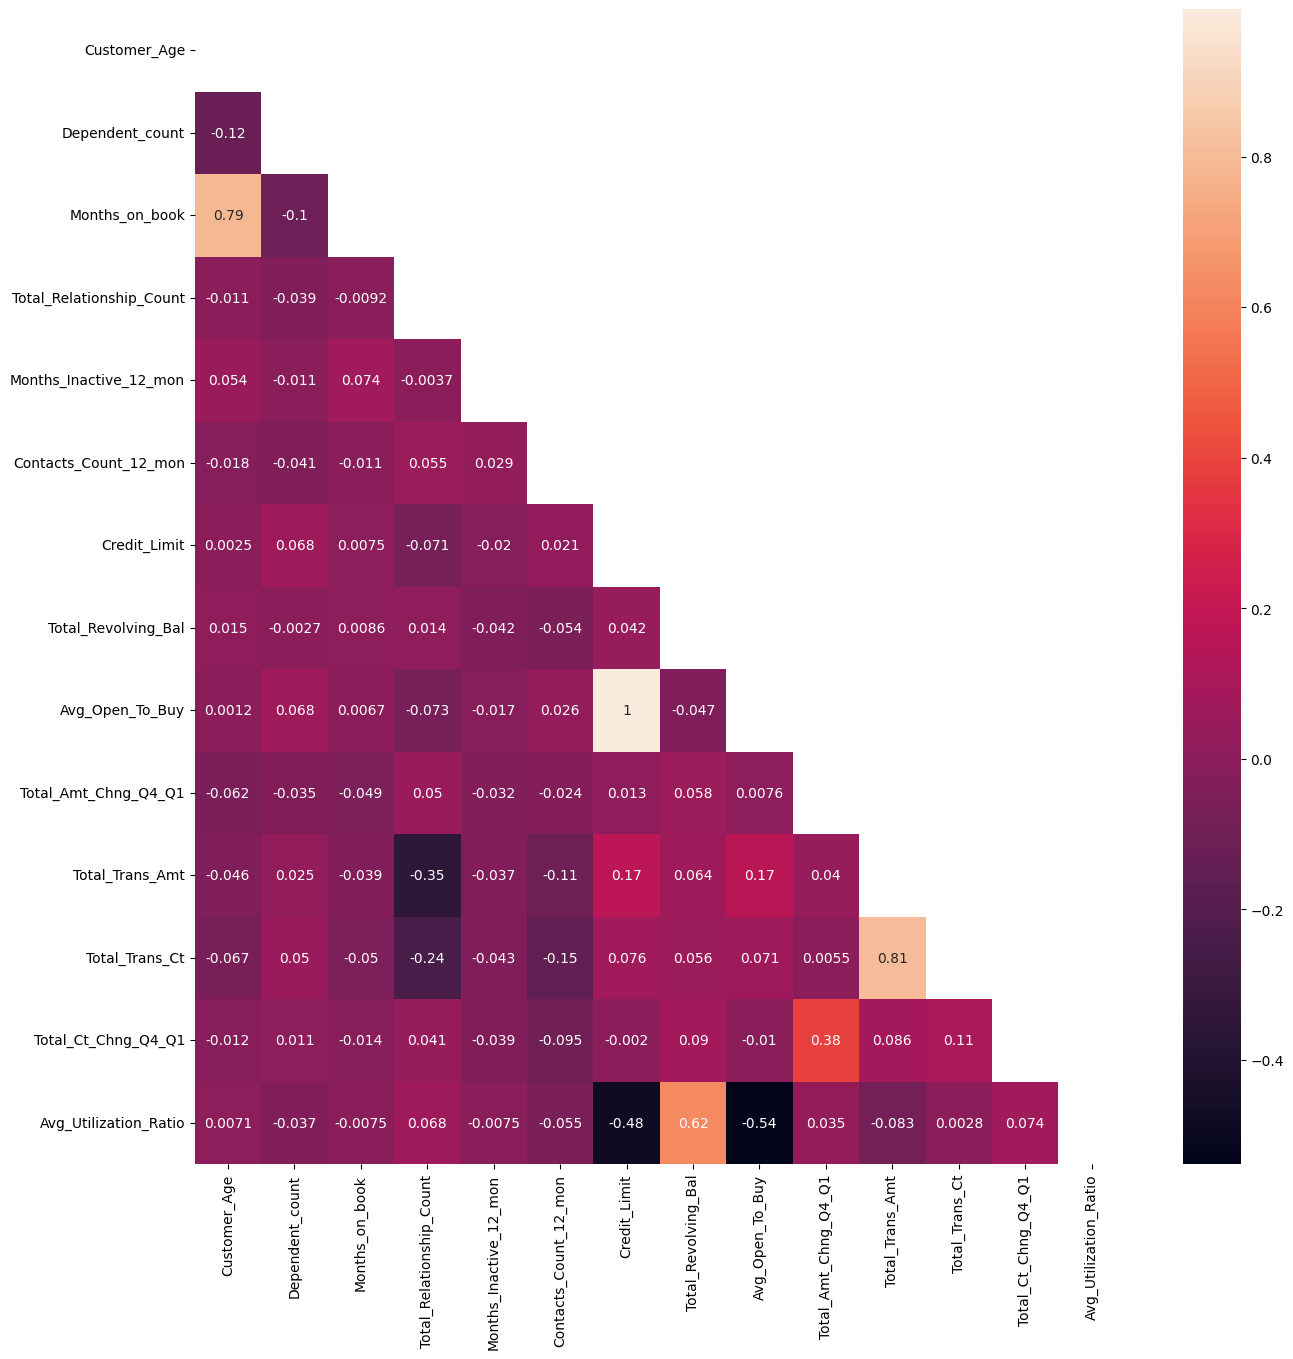

In [26]:
plt.subplots(figsize=(15,15))
cor = data_numeric.corr()
mask = np.triu(cor)     # Selecting just the upper part of the correlation matrix
sns.heatmap(cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values, annot=True, mask=mask)

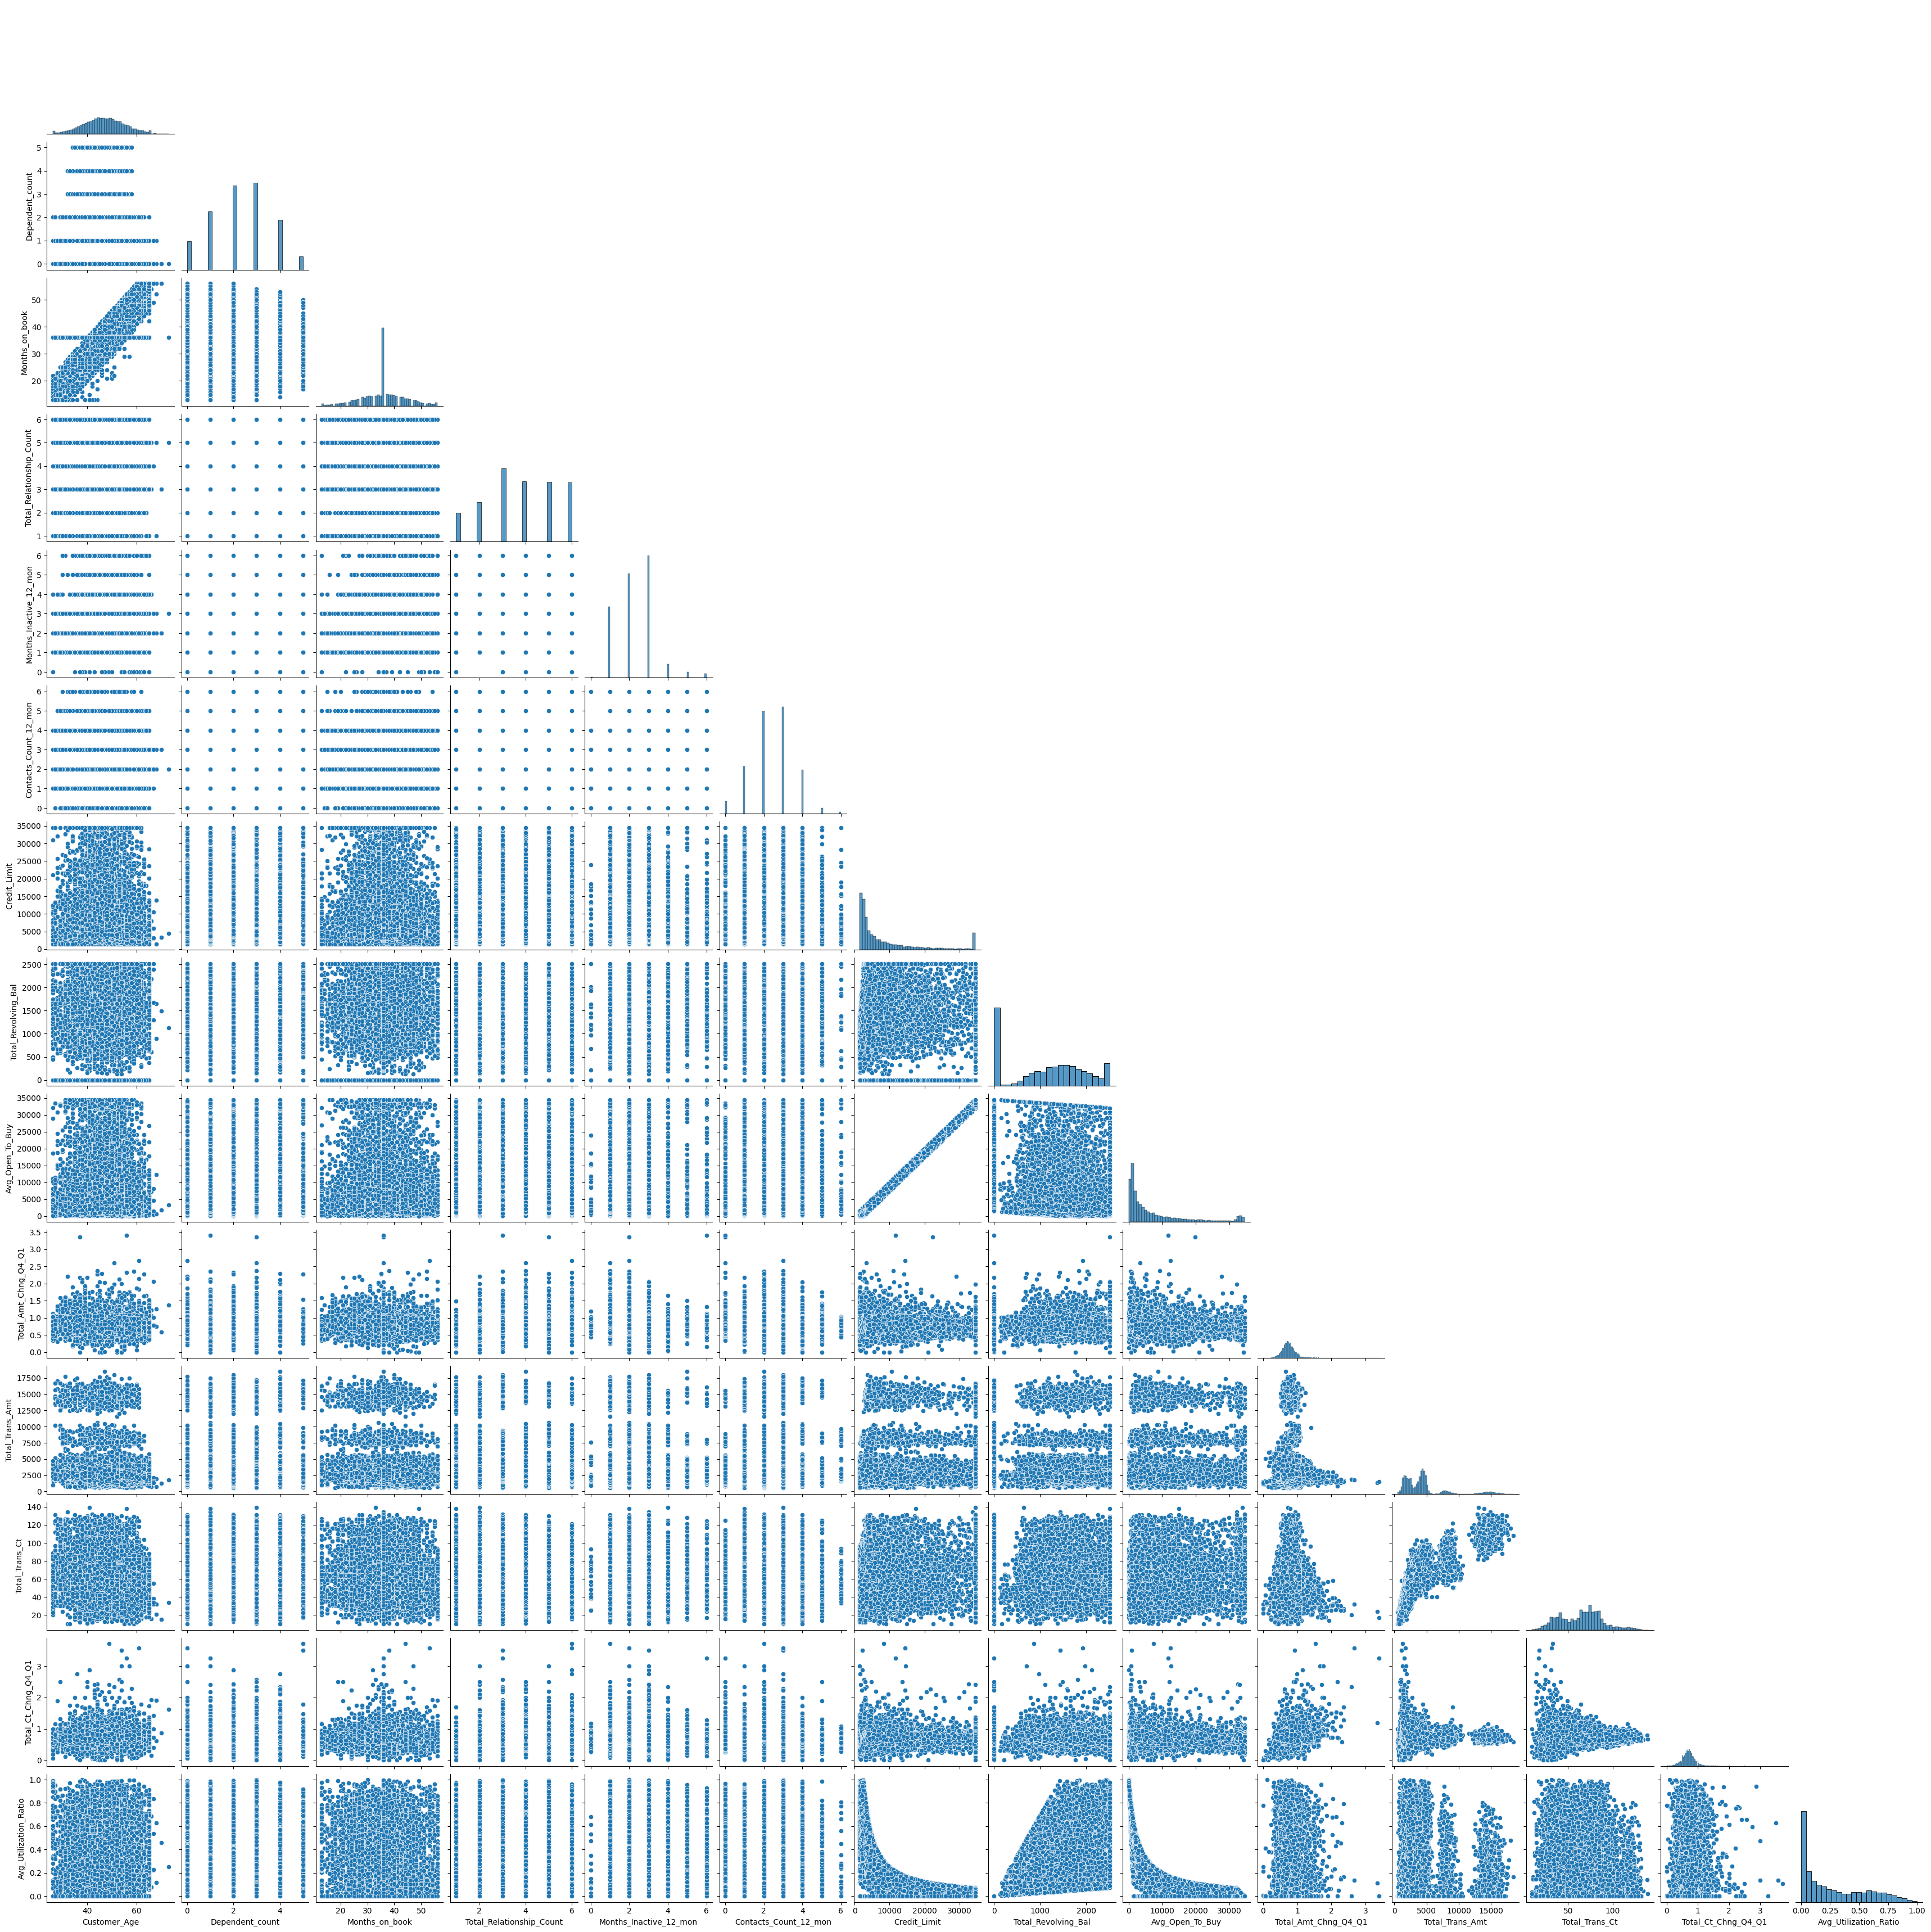

In [27]:
sns.pairplot(data_numeric, corner=True)

There are variables with non linear dependence (scatterplot above), for example, 'Avg_Utilization_Ratio' and 'Credit_limit' and 'Avg_Utilization_Ratio' and 'Avg_Open_To_Buy'. We can see an exponential relationship between that variables. 

We can see the linear dependence with the following variables: 'Total_Trans_Amt' and 'Total_Trans_Ct', 'Credit_limit' and 'Avg_Open_To_Buy', 'Customer_Age' and 'Months_On_Book'.

Using the ideias shown above, we will not consider the following attributes: 'Months_on_book', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Trans_Ct' and 'Total_Ct_Chng_Q4_Q1'.

In [30]:
Remove = ['Months_on_book', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
data_numeric.drop(Remove, inplace=True, axis='columns')
data_numeric.head()

/home/hugo/.local/lib/python3.10/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt
0,45,3,5,1,3,777,11914.0,1.335,1144
1,49,5,6,1,2,864,7392.0,1.541,1291
2,51,3,4,1,0,0,3418.0,2.594,1887
3,40,4,3,4,1,2517,796.0,1.405,1171
4,40,3,5,1,0,0,4716.0,2.175,816


Transforming categorical variables

In [47]:
data_cat = categorizar(data_object)
data_cat.head()

/home/hugo/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Attrition_Flag,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,3,1,2,0
1,1,2,2,4,0
2,1,2,1,3,0
3,1,3,3,4,0
4,1,5,1,2,0


In [50]:
data_cat['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

We will change the target label, because we want to model the "bad guy", aka, 'Attrited Customer'.

In [49]:
dic_Attrition_Flag = {
    1:0,
    0:1
}

data_cat['Attrition_Flag'] = data_cat['Attrition_Flag'].map(dic_Attrition_Flag)

In [51]:
data_full = pd.concat([data_cat, data_numeric], axis=1)
data_full.head()

,Attrition_Flag,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt
0,0,3,1,2,0,45,3,5,1,3,777,11914.0,1.335,1144
1,0,2,2,4,0,49,5,6,1,2,864,7392.0,1.541,1291
2,0,2,1,3,0,51,3,4,1,0,0,3418.0,2.594,1887
3,0,3,3,4,0,40,4,3,4,1,2517,796.0,1.405,1171
4,0,5,1,2,0,40,3,5,1,0,0,4716.0,2.175,816


# Train/test split